## Tutorial notebook on how to use the CLMS Data Store and its `preload_data` method for `EEA pre-packaged` datasets from the `CLMS API`

This notebook shows the preloading of pre-packaged EEA datasets from the CLMS API that is then converted to `.zarr` for efficient processing.

### Setup
In order to run this notebook, you need to install [`xcube_clms`](https://github.com/xcube-dev/xcube-clms). You can install it following either of the steps below:

1. via `conda-forge`
```bash
conda env create -f environment.yml
conda activate xcube-clms
conda install xcube-clms
```

2. via Development mode

```bash
git clone https://github.com/xcube-dev/xcube-clms.git
cd xcube-clms
conda env create -f environment.yml
conda activate xcube-clms
pip install .
```


Note that [`xcube_clms`](https://github.com/xcube-dev/xcube-clms) is a plugin of [`xcube`](https://xcube.readthedocs.io/en/latest/), where `xcube` is included in the `environment.yml`.  

You also need the credentials from the Land Monitoring service. Please follows the steps outlined [`here`](https://eea.github.io/clms-api-docs/authentication.html) to download your credentials and place them in the same directory as this notebook.

In [1]:
%%time
import json

from xcube.core.store import new_data_store

CPU times: user 3.93 s, sys: 384 ms, total: 4.31 s
Wall time: 2.06 s


To get the credentials.json, please follow the steps outlined [here](https://eea.github.io/clms-api-docs/authentication.html)

In [2]:
%%time
json_file_path = "credentials.json"
with open(json_file_path, "r") as j:
    credentials = json.loads(j.read())

CPU times: user 670 μs, sys: 848 μs, total: 1.52 ms
Wall time: 13.8 ms


When the user creates a new CLMS data store, they provide a path where the datasets would be preloaded. If no path is provided for this preload cache location, it will create a `clms_cache/` in the current directory to store all the downloaded data and initialize a local xcube file store.

In [3]:
%%time
clms_data_store = new_data_store("clms", credentials=credentials)

CPU times: user 48.1 ms, sys: 16 ms, total: 64.1 ms
Wall time: 71.5 ms


The `Cache Store` within the CLMS data store is another data store which can be any user-defined data store that is used by the preload handle. It defaults to the `file` store. Use `cache_id` and `cache_params` to provide information about the data store you would like to use for caching the preloaded data 

In [4]:
%%time
clms_data_store.list_data_ids()[:5]

CPU times: user 754 ms, sys: 104 ms, total: 858 ms
Wall time: 1min 18s


['clc-backbone-2021|CLMS_CLCplus_RASTER_2021',
 'clc-backbone-2018|CLMS_CLCplus_RASTER_2018_010m_eu_03035_V1_1',
 'forest-type-2015|FTY_2015_100m_eu_03035_d02_Full',
 'forest-type-2015|FTY_2015_020m_eu_03035_d04_Full',
 'forest-type-2015|FTY_2015_020m_eu_03035_d04_E00N20']

In [5]:
%%time
clms_data_store.list_data_ids(include_attrs=True)[:5]

CPU times: user 356 ms, sys: 4.12 ms, total: 361 ms
Wall time: 1.33 s


[('clc-backbone-2021|CLMS_CLCplus_RASTER_2021',
  {'@id': 'b813d203-d09b-4663-95f7-65dc6d53789e',
   'area': 'Europe',
   'file': 'CLMS_CLCplus_RASTER_2021',
   'format': 'Geotiff',
   'path': 'H:\\Corine_Land_Cover_Backbone\\Corine_Land_Cover_Backbone_CLCBB_2021\\CLC_BB_2021\\Data\\data-details\\raster\\CLMS_CLCplus_RASTER_2021.zip',
   'resolution': '10 m',
   'size': '7 GB',
   'source': 'EEA',
   'title': '',
   'type': 'Raster',
   'version': 'V1_1',
   'year': ''}),
 ('clc-backbone-2018|CLMS_CLCplus_RASTER_2018_010m_eu_03035_V1_1',
  {'@id': 'c3290e93-1463-4bed-93c9-6315b0059048',
   'area': 'Europe',
   'file': 'CLMS_CLCplus_RASTER_2018_010m_eu_03035_V1_1',
   'format': 'Geotiff',
   'path': 'H:\\Corine_Land_Cover_Backbone\\Corine_Land_Cover_Backbone_CLCBB_2018\\CLC_BB_2018\\Data\\data-details\\raster\\CLMS_CLCplus_RASTER_2018_010m_eu_03035_V1_1.zip',
   'resolution': '10 m',
   'size': '9 GB',
   'source': 'EEA',
   'title': '',
   'type': 'Raster',
   'version': 'V1_1',
   'ye

In [6]:
%%time
clms_data_store.cache_store.root

CPU times: user 7 μs, sys: 1 μs, total: 8 μs
Wall time: 10.3 μs


'/home/yogesh/Projects/BC/xcube-clms/examples/notebooks/clms_cache'

In [7]:
%%time
clms_data_store.get_data_store_params_schema()

CPU times: user 46 μs, sys: 5 μs, total: 51 μs
Wall time: 54.6 μs


With the following command, the users can see how the data_ids look like for the CLMS store. Due to the nature of the API, we came up with the computed data_id for some products containing several datasets within it that combines the product_id and item_id along with the `|` separator. But as a user, you dont have to worry about how it is created, but just that you need to use the complete data_id for interacting with any of the methods of this store

In [8]:
%%time
clms_data_store.list_data_ids()[:20]

CPU times: user 357 ms, sys: 3.92 ms, total: 360 ms
Wall time: 1.09 s


['clc-backbone-2021|CLMS_CLCplus_RASTER_2021',
 'clc-backbone-2018|CLMS_CLCplus_RASTER_2018_010m_eu_03035_V1_1',
 'forest-type-2015|FTY_2015_100m_eu_03035_d02_Full',
 'forest-type-2015|FTY_2015_020m_eu_03035_d04_Full',
 'forest-type-2015|FTY_2015_020m_eu_03035_d04_E00N20',
 'forest-type-2015|FTY_2015_020m_eu_03035_d04_E10N00',
 'forest-type-2015|FTY_2015_020m_eu_03035_d04_E10N10',
 'forest-type-2015|FTY_2015_020m_eu_03035_d04_E10N20',
 'forest-type-2015|FTY_2015_020m_eu_03035_d04_E20N10',
 'forest-type-2015|FTY_2015_020m_eu_03035_d04_E20N20',
 'forest-type-2015|FTY_2015_020m_eu_03035_d04_E20N30',
 'forest-type-2015|FTY_2015_020m_eu_03035_d04_E20N40',
 'forest-type-2015|FTY_2015_020m_eu_03035_d04_E20N50',
 'forest-type-2015|FTY_2015_020m_eu_03035_d04_E30N10',
 'forest-type-2015|FTY_2015_020m_eu_03035_d04_E30N20',
 'forest-type-2015|FTY_2015_020m_eu_03035_d04_E30N30',
 'forest-type-2015|FTY_2015_020m_eu_03035_d04_E30N40',
 'forest-type-2015|FTY_2015_020m_eu_03035_d04_E30N50',
 'forest-ty

In [9]:
%%time
clms_data_store.get_data_opener_ids()

CPU times: user 5 μs, sys: 1 μs, total: 6 μs
Wall time: 9.06 μs


('dataset:zarr:file', 'dataset:netcdf:https')

In [10]:
%%time
clms_data_store.get_data_types()

CPU times: user 11 μs, sys: 1 μs, total: 12 μs
Wall time: 17.4 μs


('dataset',)

In [11]:
%%time
clms_data_store.get_open_data_params_schema()

CPU times: user 54.3 ms, sys: 1.04 ms, total: 55.4 ms
Wall time: 992 ms


In [12]:
%%time
clms_data_store.get_preload_data_params_schema()

CPU times: user 37 μs, sys: 4 μs, total: 41 μs
Wall time: 43.2 μs


In [6]:
%%time
dataset_to_preload = (
    "tree-cover-density-2015|TCD_2015_100m_eu_03035_d04_Full",
    "forest-type-2015|FTY_2015_100m_eu_03035_d02_Full",
    "forest-type-2015|FTY_2015_020m_eu_03035_d04_E00N20",
    "clc-backbone-2021|CLMS_CLCplus_RASTER_2021",
)

CPU times: user 3 μs, sys: 0 ns, total: 3 μs
Wall time: 4.29 μs


When the user runs the `preload_data` method, it returns a new cache data store with which the user can view its status using table provided via the returned `.preload_handle`, which indicates the status of the download request along with its progress, messages and exceptions, if any. It can be run in both blocking and non-blocking manner. The user can silent the progress using the silent flag. The user can also choose to cleanup the downloads.

We load 4 products as shown below. 3 of them are successful, but 1 fails because this store currently does not support that naming structure which is expected to merge the files into one zarr file. We cannot know the files beforehand, and have to download them to know if they can be merged and opened with the xcube_clms store or not. But they are downloaded to the `downloads` folder, if the user wants them as is, they can move those files to the `clms_cache` folder where they can be opened using `cache_data_store`.

In [7]:
%%time
cache_data_store = clms_data_store.preload_data(
    *dataset_to_preload,
    blocking=False,  # Defaults to True
    cleanup=True,  # Defaults to True,
    silent=False,  # Defaults to False
    tile_size=2000,  # Defaults to 2000. You can pass a single integer, or a tuple of (int, int)
)

Data ID,Status,Progress,Message,Exception
forest-type-2015|FTY_2015_100m_eu_03035_d02_Full,COMPLETED,100%,Task ID 34336075114: Preloading Complete.,-


In [15]:
%%time
handle = cache_data_store.preload_handle
handle

CPU times: user 7 μs, sys: 7 μs, total: 14 μs
Wall time: 18.1 μs


Data ID,Status,Progress,Message,Exception
tree-cover-density-2015|TCD_2015_100m_eu_03035_d04_Full,COMPLETED,100%,Task ID 39184152495: Preloading Complete.,-
forest-type-2015|FTY_2015_100m_eu_03035_d02_Full,COMPLETED,100%,Task ID 34336075114: Preloading Complete.,-
forest-type-2015|FTY_2015_020m_eu_03035_d04_E00N20,COMPLETED,100%,Task ID 48054489581: Preloading Complete.,-
clc-backbone-2021|CLMS_CLCplus_RASTER_2021,FAILED,80%,Task ID 72494055768: Extraction complete. Processing now...,This naming format is not supported. Currently only filenames with Eastings and Northings are supported.


Now that the preload is completed, the user can open the data using open_data as usual which uses the file data store underneath at the cache location

In [8]:
%%time
cache_data_store.list_data_ids()

CPU times: user 430 μs, sys: 1.11 ms, total: 1.54 ms
Wall time: 901 μs


['forest-type-2015|FTY_2015_100m_eu_03035_d02_Full.zarr',
 'tree-cover-density-2015|TCD_2015_100m_eu_03035_d04_Full.zarr',
 'forest-type-2015|FTY_2015_020m_eu_03035_d04_E00N20.zarr']

In [9]:
cache_data_store.get_open_data_params_schema()

In [10]:
cache_data_store.get_open_data_params_schema(
    "forest-type-2015|FTY_2015_100m_eu_03035_d02_Full.zarr"
)

In [11]:
%%time
fty = cache_data_store.open_data(
    "forest-type-2015|FTY_2015_100m_eu_03035_d02_Full.zarr"
)
fty

CPU times: user 22.2 ms, sys: 4.81 ms, total: 27 ms
Wall time: 32.9 ms


<xarray.Dataset> Size: 24GB
Dimensions:                          (y: 46000, x: 65000)
Coordinates:
  * y                                (y) float64 368kB 5.5e+06 5.5e+06 ... 9e+05
  * x                                (x) float64 520kB 9e+05 ... 7.4e+06
    spatial_ref                      int64 8B ...
Data variables:
    FTY_2015_100m_eu_03035_d02_Full  (y, x) float64 24GB dask.array<chunksize=(2000, 2000), meta=np.ndarray>
Attributes:
    AREA_OR_POINT:  Area
    DataType:       Thematic

In [12]:
%%time
ftye = cache_data_store.open_data(
    "forest-type-2015|FTY_2015_020m_eu_03035_d04_E00N20.zarr"
)
ftye

CPU times: user 7.83 ms, sys: 74 μs, total: 7.91 ms
Wall time: 6.92 ms


<xarray.Dataset> Size: 2GB
Dimensions:                            (y: 50000, x: 5000)
Coordinates:
  * y                                  (y) float64 400kB 3e+06 3e+06 ... 2e+06
  * x                                  (x) float64 40kB 9e+05 9e+05 ... 1e+06
    spatial_ref                        int64 8B ...
Data variables:
    FTY_2015_020m_eu_03035_d04_E00N20  (y, x) float64 2GB dask.array<chunksize=(2000, 2000), meta=np.ndarray>
Attributes:
    AREA_OR_POINT:  Area
    DataType:       Thematic

In [13]:
%%time
tcd = cache_data_store.open_data(
    "tree-cover-density-2015|TCD_2015_100m_eu_03035_d04_Full.zarr"
)
tcd

CPU times: user 6.6 ms, sys: 1.87 ms, total: 8.46 ms
Wall time: 16 ms


<xarray.Dataset> Size: 24GB
Dimensions:                          (y: 46000, x: 65000)
Coordinates:
  * y                                (y) float64 368kB 5.5e+06 5.5e+06 ... 9e+05
  * x                                (x) float64 520kB 9e+05 ... 7.4e+06
    spatial_ref                      int64 8B ...
Data variables:
    TCD_2015_100m_eu_03035_d04_Full  (y, x) float64 24GB dask.array<chunksize=(2000, 2000), meta=np.ndarray>
Attributes:
    AREA_OR_POINT:  Area

CPU times: user 1.86 s, sys: 308 ms, total: 2.16 s
Wall time: 1.43 s


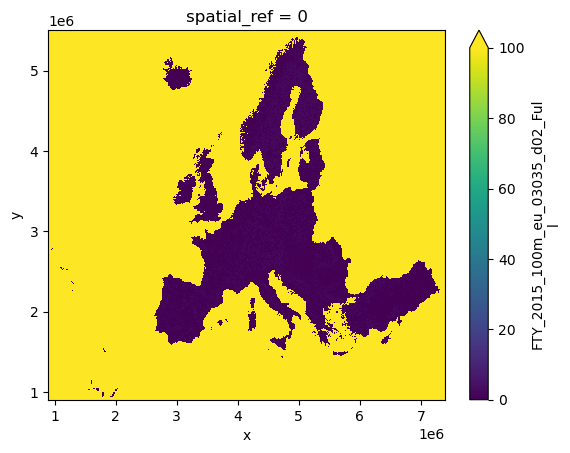

In [14]:
%%time
downsampled_cube = fty.isel(
    x=slice(None, None, 100),
    y=slice(None, None, 100),
)
downsampled_cube.FTY_2015_100m_eu_03035_d02_Full.plot(vmin=0, vmax=100)

CPU times: user 158 ms, sys: 16.4 ms, total: 174 ms
Wall time: 113 ms


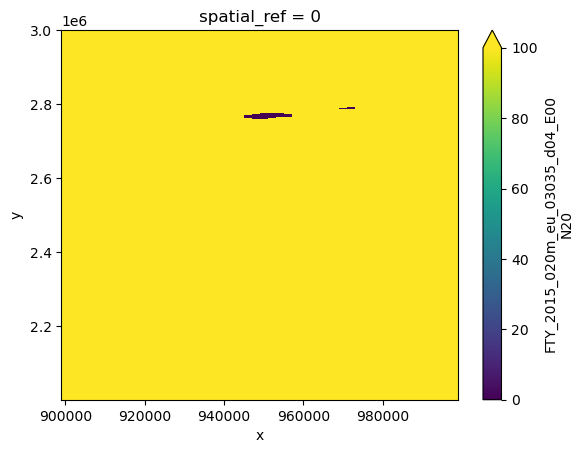

In [15]:
%%time
downsampled_cube = ftye.isel(
    x=slice(None, None, 100),
    y=slice(None, None, 100),
)
downsampled_cube.FTY_2015_020m_eu_03035_d04_E00N20.plot(vmin=0, vmax=100)

CPU times: user 1.48 s, sys: 668 ms, total: 2.15 s
Wall time: 879 ms


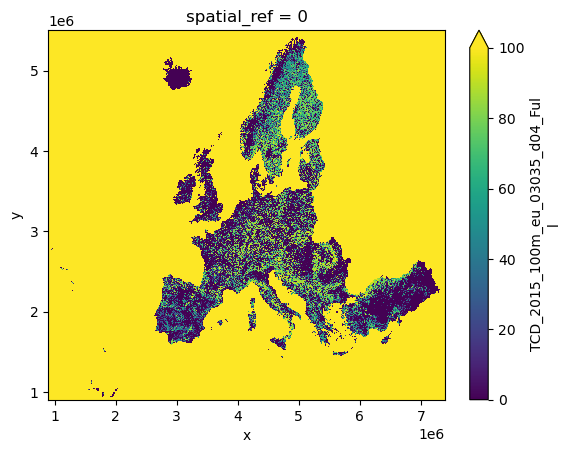

In [16]:
%%time
downsampled_cube = tcd.isel(
    x=slice(None, None, 100),
    y=slice(None, None, 100),
)
downsampled_cube.TCD_2015_100m_eu_03035_d04_Full.plot(vmin=0, vmax=100)

Execute the following command to terminate the preload job and trigger the cleanup process to clean the `downloads` directory. This step is only necessary if the preload job was originally run with `cleanup=False`, as downloads will not be removed automatically in that case. If `cleanup=True` was used (which is the default), the cleanup is performed automatically upon completion of the preload job.

In [ ]:
handle.close()
handle